In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banking-dataset-marketing-targets/train.csv
/kaggle/input/banking-dataset-marketing-targets/test.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from ydata_profiling import ProfileReport
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/kaggle/input/banking-dataset-marketing-targets/train.csv",sep=";")
train.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
test = pd.read_csv("/kaggle/input/banking-dataset-marketing-targets/test.csv",sep=";")
test.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [5]:
train.shape

(45211, 17)

In [6]:
test.shape

(4521, 17)

In [7]:
train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
test.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
train.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [11]:
# Profile Report for the all the train variables 
profile = ProfileReport(train, title='Banking Report for the Portuguese Bank', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# spliting the data into dependent and independent sets
train_x = train.iloc[:,:-1]
train_y = train.y

test_x = test.iloc[:,:-1]
test_y = test.y

In [13]:
train_x.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may       261         1     -1         0  unknown  
1  unknown    5   may       151         1     -1         0  unknown  
2  unknown    5   may        76         1     -1         0  unknown  
3  unknown    5   may        92         1     -1         0  unknown  
4  unknown    5   may       198         1     -1         0  unknown

In [14]:
train_y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [15]:
# Object Columns need to be Converted to Numerical values to model
encoding_columns = list(train_x.select_dtypes(include=object))
encoding_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [16]:
# importing warning to remove the future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [17]:
print(train_x['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary']


In [18]:
values = {'unknown': 0, 'primary': 1,'secondary': 2,'tertiary': 3}

train_x['education'] = train_x['education'].replace(values)
test_x['education'] = test_x['education'].replace(values)
# label encoding the education columns as this will assign numerical value to each of the cateogry.

In [19]:
print(train_x['education'].value_counts())

education
2    23202
3    13301
1     6851
0     1857
Name: count, dtype: int64


In [20]:
cols = list(train_x.select_dtypes(include =object)) 
train_x = pd.get_dummies(train_x,columns = cols,prefix = cols)
test_x = pd.get_dummies(test_x,columns=cols,prefix = cols)

train_x.head()
#using one-hot encoding to create the binary columns for every category in the categorical value

age  education  balance  day  duration  campaign  pdays  previous  \
0   58          3     2143    5       261         1     -1         0   
1   44          2       29    5       151         1     -1         0   
2   33          2        2    5        76         1     -1         0   
3   47          0     1506    5        92         1     -1         0   
4   33          0        1    5       198         1     -1         0   

   job_admin.  job_blue-collar  ...  month_jun  month_mar  month_may  \
0       False            False  ...      False      False       True   
1       False            False  ...      False      False       True   
2       False            False  ...      False      False       True   
3       False             True  ...      False      False       True   
4       False            False  ...      False      False       True   

   month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0      False      False      False             False           False   
1      False      False      False             False           False   
2      False      False      False             False           False   
3      False      False      False             False           False   
4      False      False      False             False           False   

   poutcome_success  poutcome_unknown  
0             False              True  
1             False              True  
2             False              True  
3             False              True  
4             False              True  

[5 rows x 48 columns]

In [21]:
# train the model

model = RandomForestClassifier(random_state=0)
model.fit(train_x,train_y)

RandomForestClassifier(random_state=0)

In [22]:
# predicting the model
model_predict = model.predict(train_x)
print(model_predict[:7])
train_y.iloc[:7]
# according this result we can say that the model is predicting correctly.

['no' 'no' 'no' 'no' 'no' 'no' 'no']


0    no
1    no
2    no
3    no
4    no
5    no
6    no
Name: y, dtype: object

In [23]:
# checking for the accuracy and classification report
acc = accuracy_score(train_y,model_predict)
print(f"Accuracy Score:{acc}")
print("\n")
report = classification_report(train_y,model_predict)
print(f"Classification Report:{report}")

Accuracy Score:1.0


Classification Report:              precision    recall  f1-score   support

          no       1.00      1.00      1.00     39922
         yes       1.00      1.00      1.00      5289

    accuracy                           1.00     45211
   macro avg       1.00      1.00      1.00     45211
weighted avg       1.00      1.00      1.00     45211



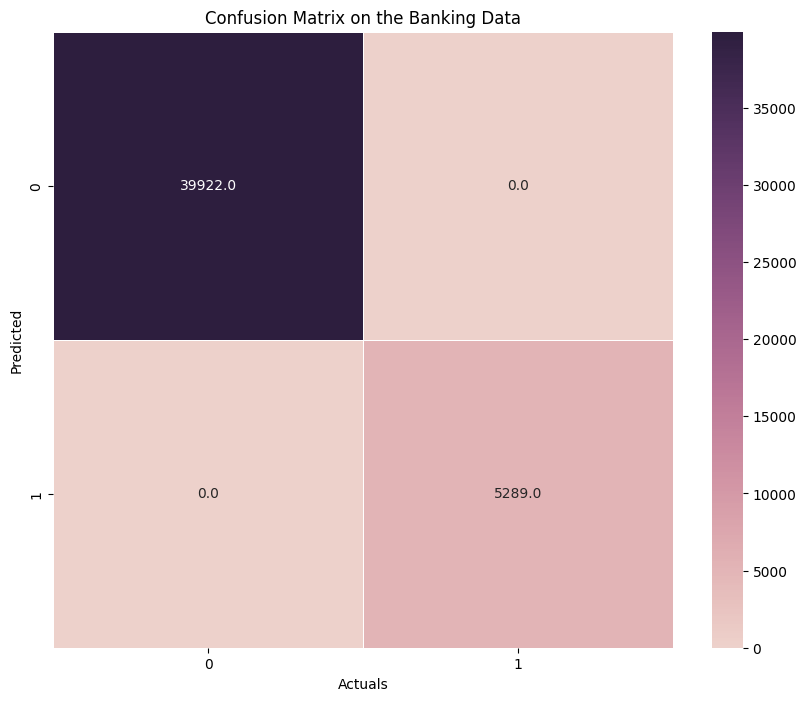

In [24]:
# checking the confusion matrix 
conf_mt = confusion_matrix(model_predict,train_y)
plt.figure(figsize = (10,8))
plt.title('Confusion Matrix on the Banking Data')
sns.heatmap(conf_mt,annot=True,fmt=".1f",linewidth=.5,cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.show()

In [25]:
"""from the above confusion matrix , it can be said that the model has predicted the values accurately 
and there is no false positive and false negative value being predicted during the model fiting """

'from the above confusion matrix , it can be said that the model has predicted the values accurately \nand there is no false positive and false negative value being predicted during the model fiting '

In [26]:
# testing the new data present in the test dataset
y_model_predict = model.predict(test_x)

In [27]:
print(y_model_predict[:7])
print(test_y.iloc[:7])
# according this result we can say that the model is predicting correctly.

['no' 'no' 'no' 'no' 'no' 'no' 'no']
0    no
1    no
2    no
3    no
4    no
5    no
6    no
Name: y, dtype: object


In [28]:
# checking for the accuracy and classification report
y_acc = accuracy_score(test_y, y_model_predict)
print(f"Accuracy is:{y_acc}")

print("\n")

y_report = classification_report(test_y,y_model_predict)
print(f"Classification Report:{y_report}")


Accuracy is:1.0


Classification Report:              precision    recall  f1-score   support

          no       1.00      1.00      1.00      4000
         yes       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



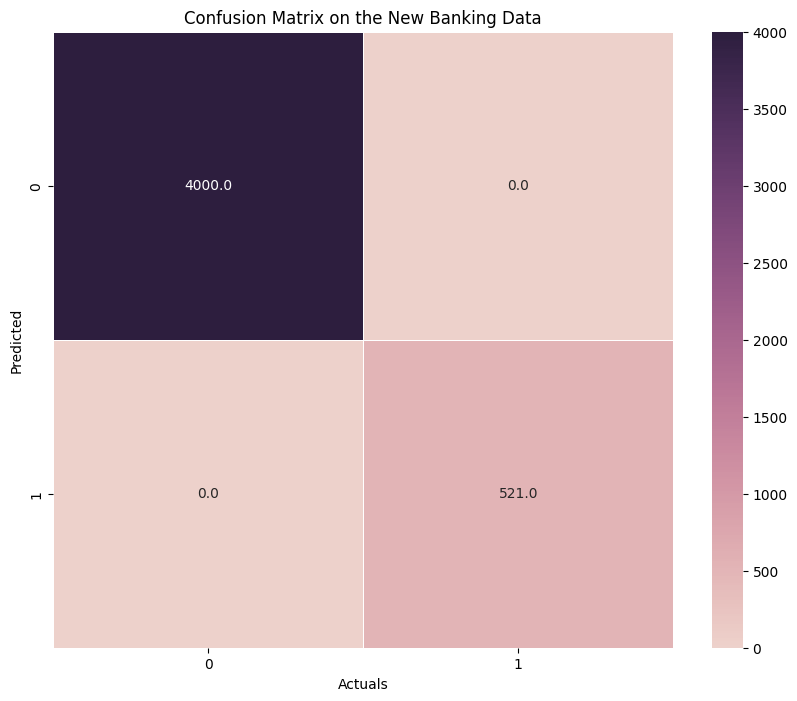

In [29]:
# checking the confusion matrix for new data
y_conf_mt = confusion_matrix(y_model_predict,test_y)
plt.figure(figsize = (10,8))
plt.title('Confusion Matrix on the New Banking Data')
sns.heatmap(y_conf_mt,annot=True,fmt=".1f",linewidth=.5,cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.show()

In [30]:
"""from the above confusion matrix , it can be said that the model has predicted the values accurately 
and there is no false positive and false negative value being predicted during the model fiting """

'from the above confusion matrix , it can be said that the model has predicted the values accurately \nand there is no false positive and false negative value being predicted during the model fiting '